## **Task 1:** 

## **Dataset's Content**

**Survival** - survival (0 = No, 1 = Yes).

**pclass** - Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd).

**sex** - sex.

**Age** - Age.

**sibsp** - # of siblings / spouses aboard the Titanic.

**parch** - # of parents / children aboard the Titanic.


**ticket** - Ticket number.

**fare** - Passenger fare.

**cabin** - Cabin number.

 **embarked** - Port of Embarkation (C = Cherbourg, Q = Queenstown, S = SouthamptonDataset’s).



Importing Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading Dataset

In [54]:
data=pd.read_csv(r'd:\My Data\MIA bootcamp\day 1\task\titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Data cleaning

In [56]:
# Checking for null values

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [57]:
# Handling null values

data.drop(data[data["Embarked"].isnull()].index,axis=0,inplace=True)
data['Age']=data['Age'].fillna(data['Age'].median())
data.drop("Cabin",axis=1,inplace=True)

In [58]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [59]:
# Checking for duplicated values

data.duplicated().sum()

np.int64(0)

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [61]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Classification**

Feature Engineering

In [62]:
# Ckecking if the Passenger is alone or not

data["IsAlone"] = (data["SibSp"]==0)&(data["Parch"]==0)

In [63]:
# Detecting the title of each Passenger

data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\a7mad\AppData\Local\Temp\ipykernel_17468\3796479156.py:3: SyntaxWarning: invalid escape sequence '\.'
  data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


In [64]:
# Drop unnecessary columns

data.drop(["PassengerId",'Name',"Ticket","Parch","SibSp","Fare"],axis=1,inplace=True)

In [65]:
data.head()

,Survived,Pclass,Sex,Age,Embarked,IsAlone,Title
0,0,3,male,22.0,S,False,Mr
1,1,1,female,38.0,C,False,Mrs
2,1,3,female,26.0,S,True,Miss
3,1,1,female,35.0,S,False,Mrs
4,0,3,male,35.0,S,True,Mr


Label Encoding

In [66]:
data["Title"].replace({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5},inplace=True)

C:\Users\a7mad\AppData\Local\Temp\ipykernel_17468\3251951417.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Title"].replace({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5},inplace=True)
C:\Users\a7mad\AppData\Local\Temp\ipykernel_17468\3251951417.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [67]:
# Use LabelEncoder to encode categorical values into numbers

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

In [68]:
# Use LabelEncoder to encode the rest of categorical values into numbers

data['Sex']=le.fit_transform(data['Sex'])
data['Embarked']=le.fit_transform(data['Embarked'])
#data['Title']=le.fit_transform(data['Title'])
data['IsAlone']=le.fit_transform(data['IsAlone'])

Feature Selection

In [69]:
data.corr()

,Survived,Pclass,Sex,Age,Embarked,IsAlone,Title
Survived,1.000000,-0.335549,-0.541585,-0.069822,-0.169718,-0.206207,0.406716
Pclass,-0.335549,1.000000,0.127741,-0.336512,0.164681,0.138553,-0.171917
Sex,-0.541585,0.127741,1.000000,0.086506,0.110320,0.306985,-0.501916
Age,-0.069822,-0.336512,0.086506,1.000000,-0.020933,0.169518,-0.095337
Embarked,-0.169718,0.164681,0.110320,-0.020933,1.000000,0.062532,-0.061945
IsAlone,-0.206207,0.138553,0.306985,0.169518,0.062532,1.000000,-0.407851
Title,0.406716,-0.171917,-0.501916,-0.095337,-0.061945,-0.407851,1.000000


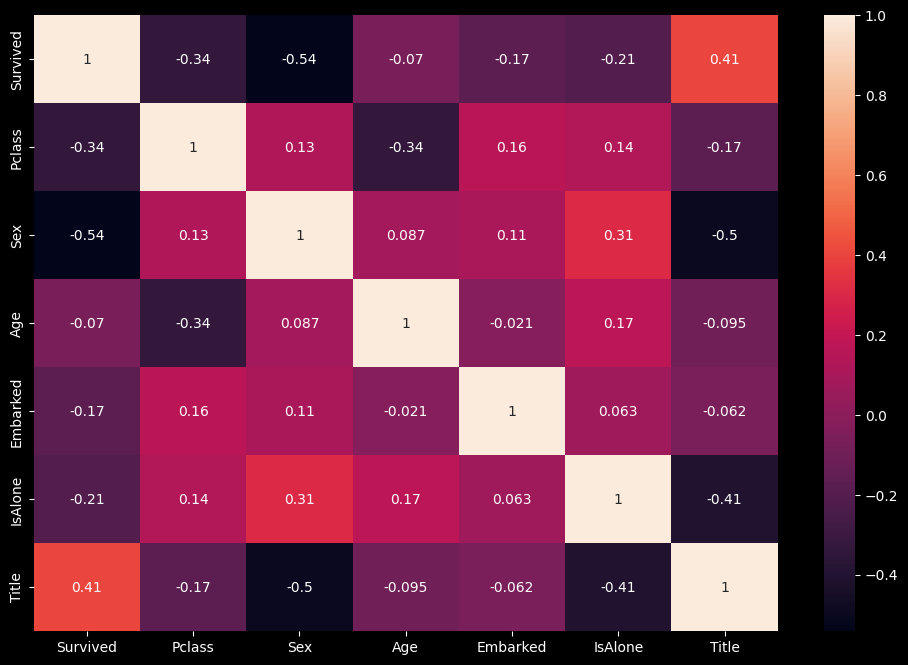

In [70]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [71]:
cor=data.corr()['Survived']
cols_to_drop=cor[(cor>-0.15)&(cor<0.15)].index
data=data.drop(cols_to_drop,axis=1)

In [72]:
data.corr()

,Survived,Pclass,Sex,Embarked,IsAlone,Title
Survived,1.000000,-0.335549,-0.541585,-0.169718,-0.206207,0.406716
Pclass,-0.335549,1.000000,0.127741,0.164681,0.138553,-0.171917
Sex,-0.541585,0.127741,1.000000,0.110320,0.306985,-0.501916
Embarked,-0.169718,0.164681,0.110320,1.000000,0.062532,-0.061945
IsAlone,-0.206207,0.138553,0.306985,0.062532,1.000000,-0.407851
Title,0.406716,-0.171917,-0.501916,-0.061945,-0.407851,1.000000


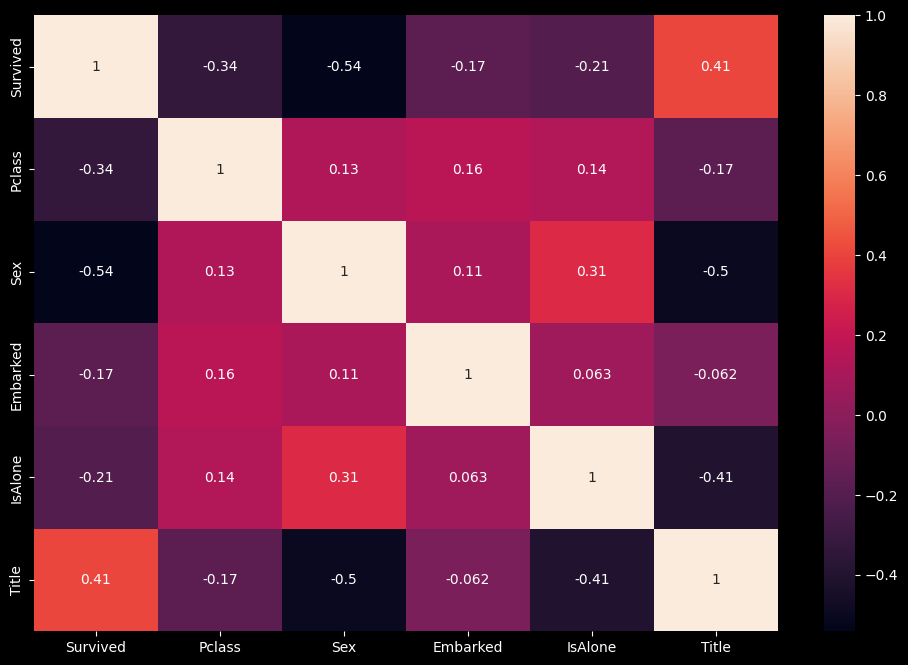

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.show()

Train - test   split

In [74]:
from sklearn.model_selection import train_test_split

X=data.drop(['Survived'],axis=1)

Y=data['Survived']

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=42)

In [75]:
# Scale all features using StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


Decision Tree

In [76]:
# Use DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,Y_train)
y_test_pred_tree = dtree.predict(X_test)

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100,200))
plot_tree(dtree)
plt.show()

In [78]:
from sklearn.metrics import accuracy_score, precision_score

accuracy = accuracy_score(Y_test, y_test_pred_tree)
print("Accuracy:", accuracy)

precision = precision_score(Y_test, y_test_pred_tree)
print("Precision:", precision)

Accuracy: 0.8089887640449438
Precision: 0.8070175438596491
